<a href="https://colab.research.google.com/github/simplifique-treinamentos/curso-intro-python/blob/main/Viz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Visualização de dados com Seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns #biblioteca para gerar gráficos

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

## 1.1) Carrego o dataset

In [ ]:
caminho = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

In [ ]:
df_diabetes = pd.read_csv(caminho, header=None, sep="," , decimal=".")
df_diabetes.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_diabetes.shape

(768, 9)

## 1.2) Renomeio as colunas

In [ ]:
df_diabetes.columns = ['num_gravidez','glicose','pressao_dias','espessura_pele',
                        'teste_insulina', 'imc', 'diabetes_pedigree_function',
                        'idade', 'diabetes'
                      ]
df_diabetes.head()

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Recategorizo a variável gravidez_categorica
df_diabetes['gravidez_categorica'] = pd.cut(x=df_diabetes['num_gravidez'],
                                              bins=[0, 2, 5, 100],
                                              labels=['0 a 2', '3 a 5', 'mais de 5'],
                                              include_lowest= True
                                            )

## 1.3) Histograma

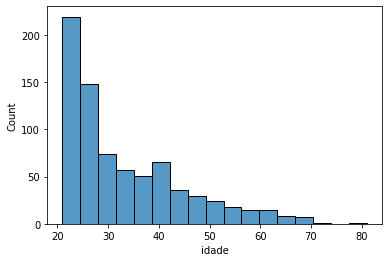

In [ ]:
sns.histplot(data=df_diabetes, x="idade")

## 1.4) Boxplot

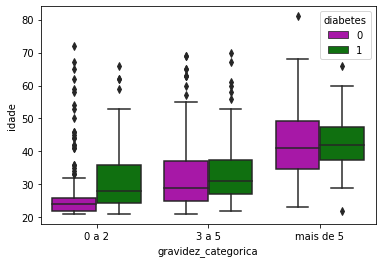

In [ ]:
sns.boxplot(x="gravidez_categorica", y="idade",
            hue="diabetes", palette=["m","g"],
            data=df_diabetes
            );

## 1.5) Heatmap - Mapa de calor

Primeiro, uso o método corr() do pandas para calcular o valor da correlação entre as variáveis.

In [ ]:
df_corr = df_diabetes.drop(['diabetes'],axis=1).corr(method="pearson").abs()
df_corr

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade
num_gravidez,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341
glicose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pressao_dias,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
espessura_pele,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970
teste_insulina,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163
imc,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
diabetes_pedigree_function,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
idade,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000


Exibo o mapa de calor. <br />
Neste gráfico, as cores mais claras indicam maior correlação. <br />
Melhoraremos ainda mais este gráfico...

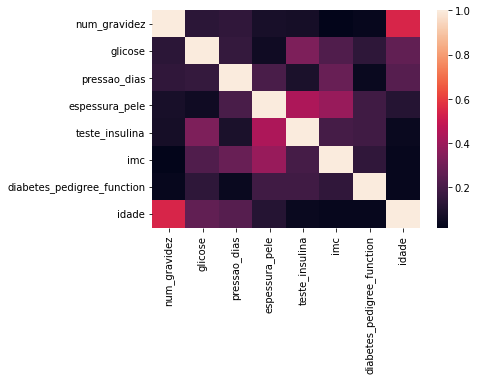

In [ ]:
sns.heatmap(df_corr)

In [ ]:
#Crio uma matriz de valores "False" para ocultar a parte diagonal superior do gráfico
mascara = np.zeros_like(df_corr, dtype=bool)

#Coloco o valor true na parte superior diagonal da matriz
mascara[np.triu_indices_from(mascara)] = True
mascara

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

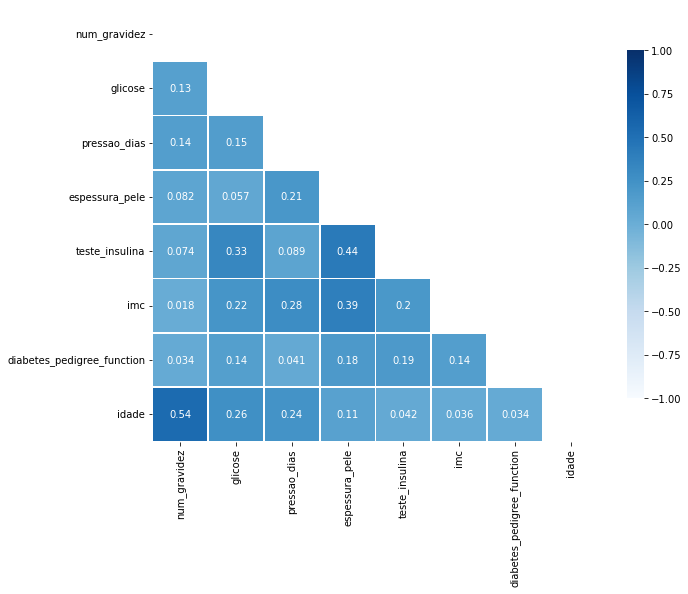

In [ ]:
#Defino o tamanho da figura (em polegadas)
f, ax = plt.subplots(figsize=(10,8))

#Gero o mapa de calor
sns.heatmap(df_corr,                    #dataframe de correlações
            mask=mascara,               #mascara para ocultar a parte diagonal superior
            cmap="Blues",               #Mapa de Cor (https://matplotlib.org/stable/tutorials/colors/colormaps.html)
            linewidths = 0.8,            #Espessura das linhas
            cbar_kws = {"shrink": .8},  #diminuo o tamanho das legendas
            annot=True,                 #escreve o valor das correlações dentro das caixas do gráfico
            vmin=-1,                    #Valor mínimo para exibição
            vmax=1                      #Valor máximo para exibição
            )

Perceba que na primeira linha e na última coluna, ficou em branco.<br/>
Vamos melhorar isso logo abaixo...

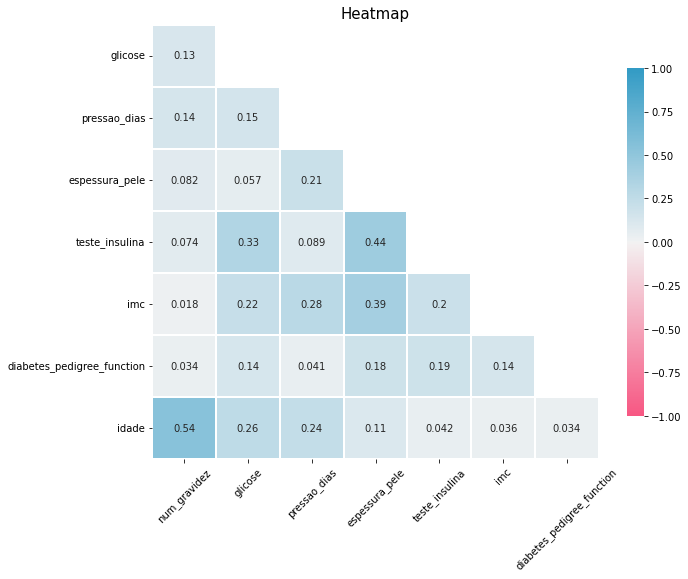

In [ ]:
#Defino o tamanho da figura (em polegadas)
f, ax = plt.subplots(figsize=(10,8))

#Crio uma matriz de valores "False" para o dataframe de correlações
mascara_corr = np.zeros_like(df_corr, dtype=bool)

#Coloco o valor true na parte superior diagonal da matriz
mascara_corr[np.triu_indices_from(mascara_corr)] = True

#Removo a primeira linha e a última coluna da mascara fazendo o slicing
mascara_corr = mascara_corr[1:,:-1]

#Crio outro dataframe para copiar somente os valores que serão plotados no gráfico
df_corr2 = df_corr.iloc[1:,:-1].copy()

#utilizo outro mapa de cores para suavizar o gráfico
mapa_cor = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

#Gero o mapa de calor
sns.heatmap(df_corr2,                   #dataframe de correlações
            mask=mascara_corr,               #mascara para ocultar a parte diagonal superior
            cmap=mapa_cor,              #Mapa de Cor (https://matplotlib.org/stable/tutorials/colors/colormaps.html)
            linewidths = 1,             #Espessura das linhas
            cbar_kws = {"shrink": .8},  #diminuo o tamanho das legendas
            annot=True,                 #escreve o valor das correlações dentro das caixas do gráfico
            vmin=-1,                    #Valor mínimo para exibição
            vmax=1                      #Valor máximo para exibição
            )

#Crio um título para o gráfico
plt.title("Heatmap", size=15)

#Inclino o texto do eixo x
plt.xticks(rotation=45)

#Finalmente, exibo o gráfico
plt.show()

## 1.6) Matriz de dispersão

Gero a matriz de dispersão. <br />
Obs: pode demorar um tempinho...

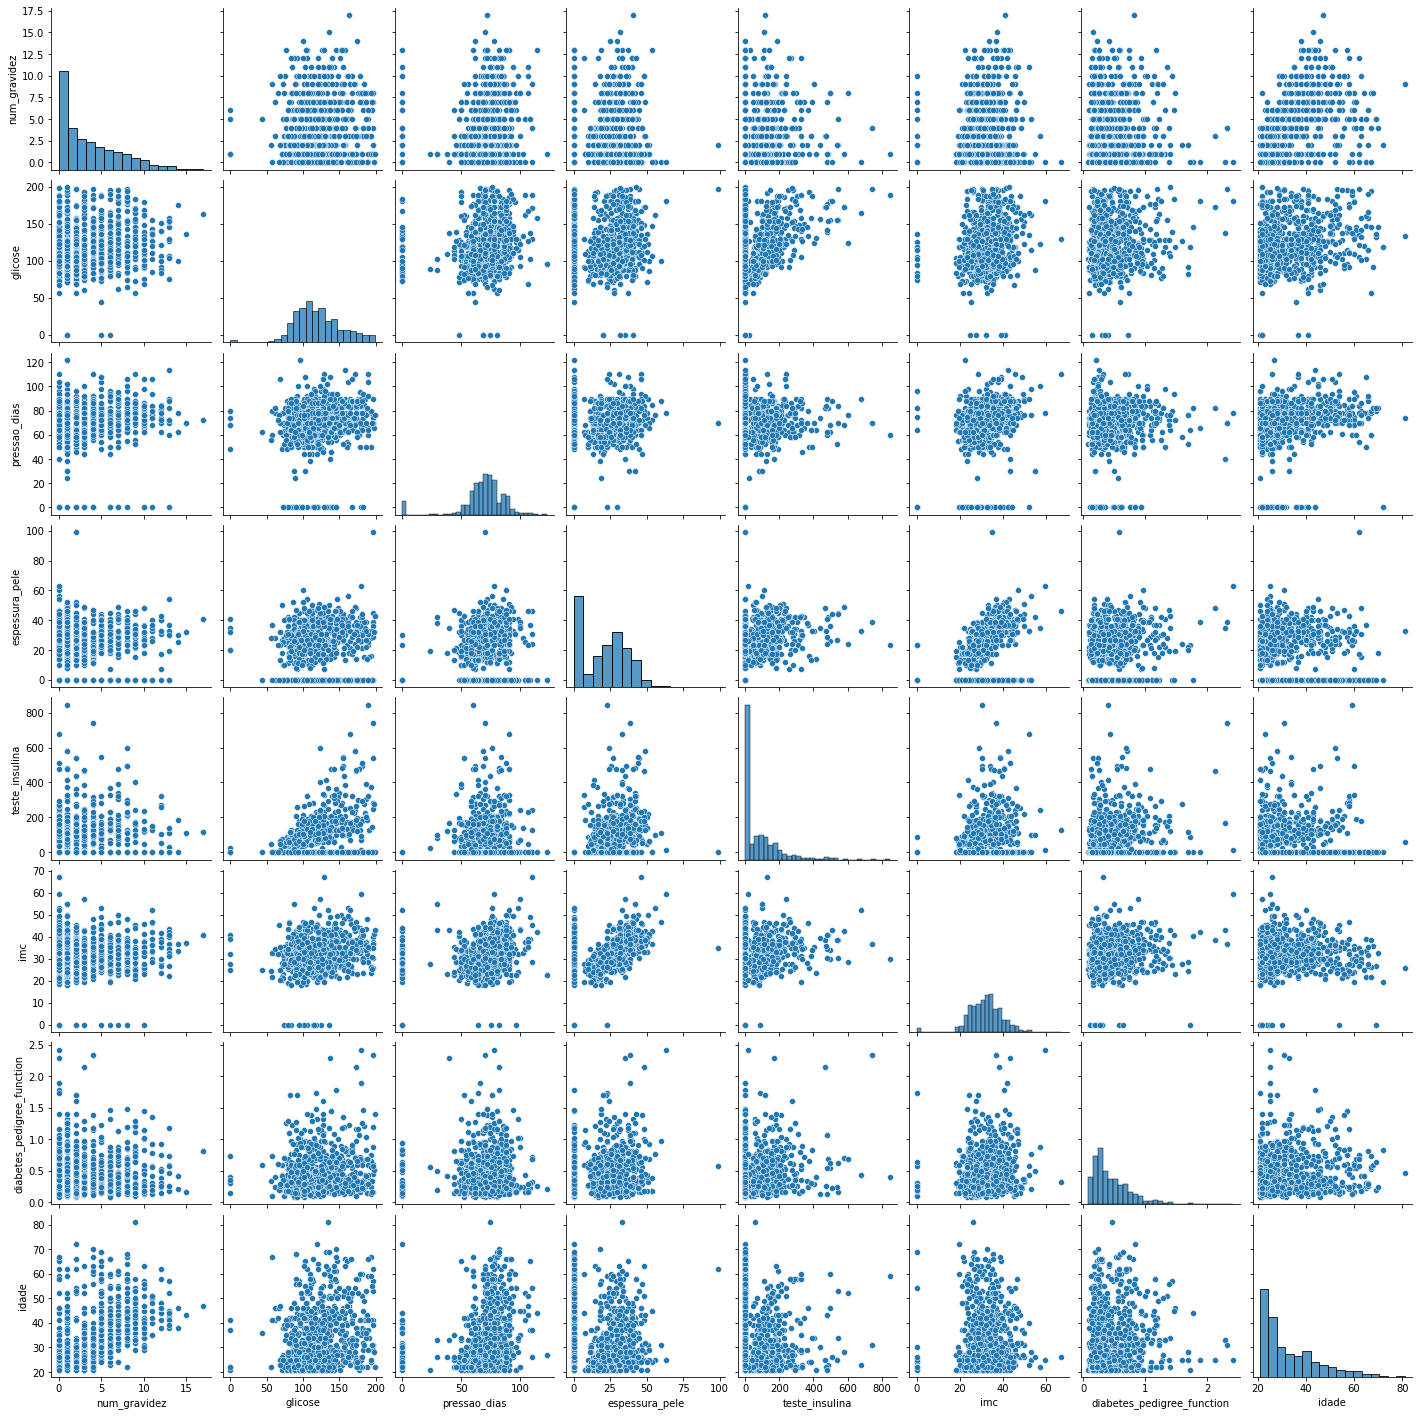

In [ ]:
sns.pairplot(df_diabetes.drop(['diabetes'], axis=1))

### 1.6.1) Matriz de dispersão om destaque para outra variável.
Desta forma é possível enxergar subgrupos e comportamentos diferentes

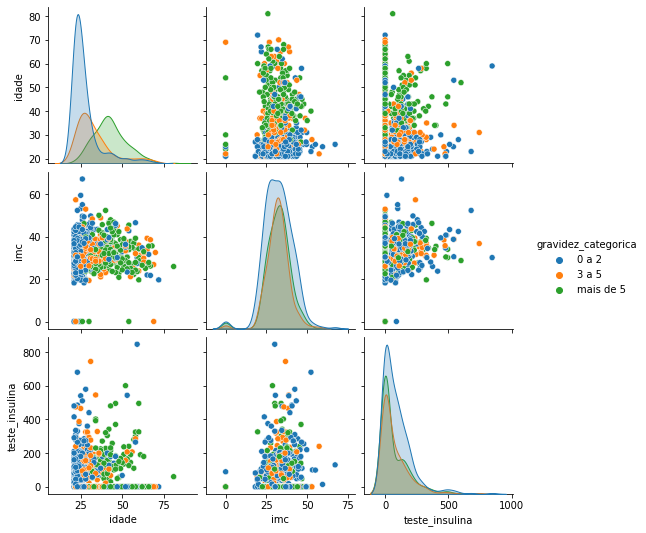

In [ ]:
sns.pairplot(df_diabetes [['idade',
                           'imc',
                           'teste_insulina',
                           'gravidez_categorica']],
             hue='gravidez_categorica'
            )